In [14]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [15]:
from tensorflow.keras.utils import load_img, img_to_array

img_path = '/content/112'
img = load_img(img_path)
img_array = img_to_array(img)


In [16]:
img_array - img_array.reshape((1,) + img_array.shape)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [17]:
# Assuming you already have:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,  # Corrected from 'shape_range'
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# img_array should be a 3D NumPy array (height, width, channels)
# If you have a single image, expand its dimensions to create a batch of 1
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)  # shape becomes (1, height, width, channels)

# Generate augmented images
augmented_images = datagen.flow(
    img_array,
    batch_size=1
)


In [18]:
import matplotlib.pyplot as plt

def visualize_augmented_images(generator, num_images):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i in range(num_images):
        batch = next(generator)
        aug_img = batch[0]  # Take the first image in the batch
        # If images are normalized (values in [0,1]), convert for imshow
        if aug_img.max() <= 1.0:
            aug_img = aug_img.clip(0, 1)
        else:
            aug_img = aug_img.astype('uint8')
        axes[i].imshow(aug_img)
        axes[i].axis('off')
    plt.show()


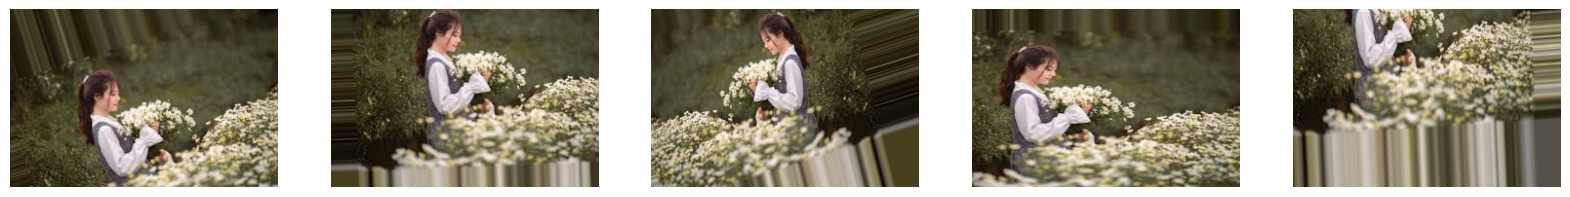

In [20]:
visualize_augmented_images(augmented_images, 5)
